# Análise de Implantação de Centros de Distribuição
- Objetivo: Encontrar o número de centros de distribuição ideal para atender a todas as lojas com eficiência

## Pacotes utilizados

In [34]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.cluster import KMeans

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Auxiliares
import os

os.chdir(os.getcwd().replace('notebooks', ''))

## Análise exploratória dos dados

In [35]:
# Importação do csv
df = pd.read_csv(
    os.path.join('dados', 'Fiap On - Fase 6 - Geolocalização Dataset - Asset.csv'),
    decimal = ','
)
df.head()

,latitude,longitude,price
0,-21.59136,-51.06669,52.47
1,-21.28535,-49.65497,37.03
2,-22.02590,-47.06702,71.50
3,-21.91623,-46.68666,88.27
4,-22.47639,-46.63278,36.16


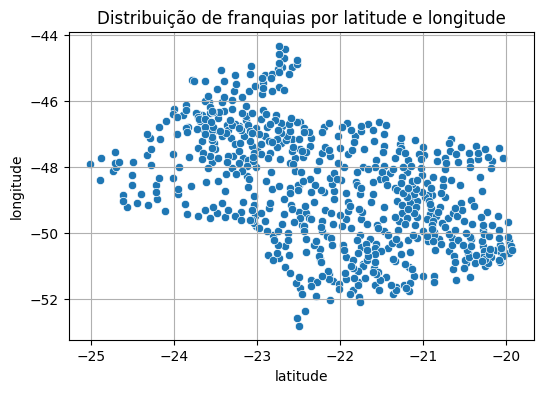

In [36]:
plt.figure(figsize = (6, 4))
sns.scatterplot(
    x = 'latitude',
    y = 'longitude',
    data = df
)
plt.grid()
plt.title('Distribuição de franquias por latitude e longitude', fontsize = 12)
plt.show()

## Análise de clusters com Kmeans

In [37]:
# Listas para armazenar os resultados
inercia_list = []
clusters_list = []

# Loop sobre diferentes quantidades de clusters
for n_clusters in range(1, 11):

    # Definir e treinar o modelo KMeans
    kmeans = KMeans(n_clusters = n_clusters, random_state = 78)
    kmeans.fit(df.drop(columns = 'price'))
    
    # Salvar as métricas
    inercia_list.append(kmeans.inertia_)
    clusters_list.append(n_clusters)

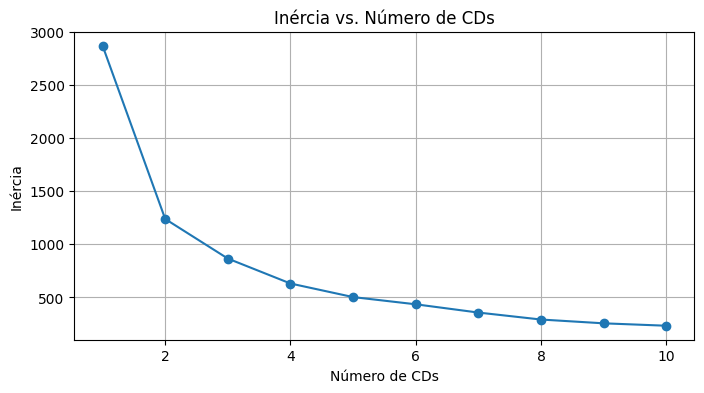

In [38]:
# Plotar o gráfico de inércia vs. número de clusters
plt.figure(figsize=(8, 4))
plt.plot(clusters_list, inercia_list, marker='o')
plt.title('Inércia vs. Número de CDs')
plt.xlabel('Número de CDs')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

Pela análise do gráfico, podemos concluir que com 4 centros de distribuição é possível chegar em um resultado satisfatório, já que não é observado uma grande redução de distância média com valores superiores a este.

## Análise dos grupos formados

### Formando os 4 grupos

In [39]:
# Treinando Kmeans com 4 clusters
kmeans = KMeans(n_clusters = 4, random_state = 78)
kmeans.fit(df.drop(columns = 'price'))

# Mostrando posição de cada cluster
for cd, (lat, long) in enumerate(kmeans.cluster_centers_):
    print(f'Centro {cd + 1} -> Latitude: {lat:.3f}, Longitude: {long:.3f}')

Centro 1 -> Latitude: -21.332, Longitude: -50.638
Centro 2 -> Latitude: -21.172, Longitude: -48.303
Centro 3 -> Latitude: -23.105, Longitude: -46.510
Centro 4 -> Latitude: -23.299, Longitude: -48.683


In [40]:
# Definindo grupos na base de dados
df['centro_distribuicao'] = kmeans.predict(df[['latitude', 'longitude']])
df['centro_distribuicao'] = df['centro_distribuicao'].map({
    0 : 'Centro 1', 1 : 'Centro 2',
    2 : 'Centro 3', 3 : 'Centro 4'
})

df.head()

,latitude,longitude,price,centro_distribuicao
0,-21.59136,-51.06669,52.47,Centro 1
1,-21.28535,-49.65497,37.03,Centro 1
2,-22.02590,-47.06702,71.50,Centro 3
3,-21.91623,-46.68666,88.27,Centro 3
4,-22.47639,-46.63278,36.16,Centro 3


### Posição dos centros

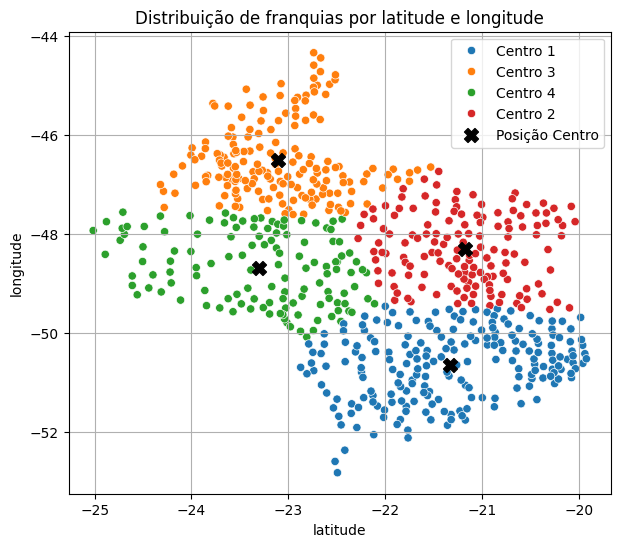

In [41]:
# Mostrando que centro atenderia qual franquia
plt.figure(figsize = (7, 6))
sns.scatterplot(
    x = 'latitude',
    y = 'longitude',
    hue = 'centro_distribuicao',
    data = df
)
plt.grid()
plt.title('Distribuição de franquias por latitude e longitude', fontsize = 12)

# Mostrando posição dos centros
plt.scatter(
    x = [posicao[0] for posicao in  kmeans.cluster_centers_],
    y = [posicao[1] for posicao in  kmeans.cluster_centers_],
    marker = 'X',
    color = 'black',
    label = 'Posição Centro',
    s = 100
)

plt.legend()
plt.show()

### Desempenho dos centros de distribuição

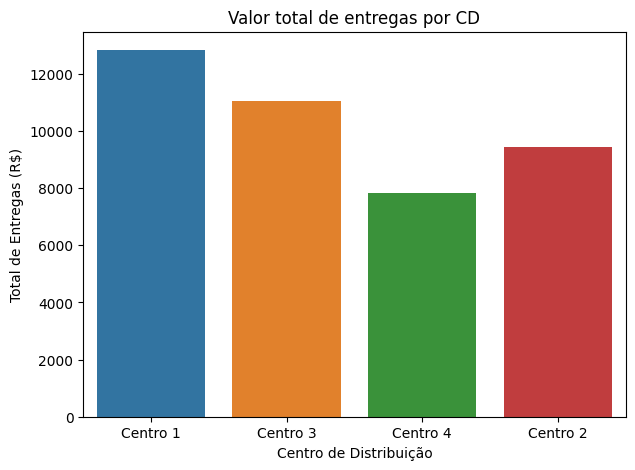

In [42]:
# Plotando gráfico de desempenho
plt.figure(figsize = (7, 5))
sns.barplot(
    y = 'price',
    x = 'centro_distribuicao',
    data = df,
    errorbar = None,
    hue = 'centro_distribuicao',
    estimator = 'sum'
)
plt.title('Valor total de entregas por CD', fontsize = 12)
plt.xlabel('Centro de Distribuição')
plt.ylabel('Total de Entregas (R$)')
plt.show()

## Resultados

### Algorítmo de clusterização escolhido: __KMeans__
Motivos:
- É fácil de implementar e executa rapidamente, o que facilita testar muitas possibilidades de quantidade de centros de distribuição.
- Ele é eficaz na identificação de grupos distintos dentro dos dados, o que é essencial para a escolha de locais que maximizem a cobertura e minimizem a distância de entrega.

### Avaliação da análise
- Foi possível chegar a um resultado claro de quantos centros de distribuição seriam necessários para chegar em uma cobertura satisfatória.